<a href="https://colab.research.google.com/github/yulita231/Customer-Shopping-Behavior-Analysis/blob/main/customerShoping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Customer Shopping Behavior Analysis

## Business Problem
Perusahaan e-commerce perlu memahami faktor-faktor apa yang memengaruhi keputusan pembelian pelanggan dan bagaimana pelanggan berperilaku saat berbelanja online.

Analisis ini bertujuan untuk:
1. Mengidentifikasi faktor-faktor kunci yang memengaruhi keputusan pembelian pelanggan, seperti diskon, metode pembayaran, opsi pengiriman, dan karakteristik pelanggan.

2. Menganalisis pola belanja pelanggan untuk mengidentifikasi strategi bisnis potensial terkait promosi, manajemen produk, dan segmentasi pelanggan.




In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/content/shopping_behavior_updated.csv")

print()
print("informasi dataset Customer")
df.info()


informasi dataset Customer
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code U

## Data Understanding
Set data ini berisi informasi demografis pelanggan, rincian pembelian, dan atribut terkait transaksi dari platform ritel online.

Key Observation:
- Jumlah baris: 3900
- Jumlah kolom: 18
- Tipe data meliputi variabel numerik dan kategorikal.
- Tidak ditemukan nilai yang hilang

In [7]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [8]:
df.columns.tolist()

['Customer ID',
 'Age',
 'Gender',
 'Item Purchased',
 'Category',
 'Purchase Amount (USD)',
 'Location',
 'Size',
 'Color',
 'Season',
 'Review Rating',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Previous Purchases',
 'Payment Method',
 'Frequency of Purchases']

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,NaN,NaN,NaN,1950.5,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,NaN,NaN,NaN,44.068462,15.207589,18.0,31.0,44.0,57.0,70.0
Gender,3900,2,Male,2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item Purchased,3900,25,Blouse,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,3900,4,Clothing,1737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase Amount (USD),3900.0,NaN,NaN,NaN,59.764359,23.685392,20.0,39.0,60.0,81.0,100.0
Location,3900,50,Montana,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,3900,4,M,1755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,3900,25,Olive,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Season,3900,4,Spring,999,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print("nilai unik dari kolom kategoris")
df['Category'].nunique()

print('tampilkannilai unik beserta hitungannya / jumlahnya')
print(df['Category']. value_counts())

nilai unik dari kolom kategoris
tampilkannilai unik beserta hitungannya / jumlahnya
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


In [11]:
missingValues= df.isnull().sum()
print('jumlah missing values')
print(missingValues)

jumlah missing values
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


## Exploratory Data Analysis

### 1. Dampak Diskon terhadap Perilaku Pembelian
Analisis ini mengeksplorasi perbedaan nilai pembelian dan pola pembelian antara transaksi dengan dan tanpa diskon.

Key Question:
- Apakah pembelian dengan diskon memiliki nilai transaksi yang lebih tinggi?
- Apakah pelanggan yang menggunakan diskon lebih sering berbelanja?
- Apa yang karakteristik pelanggan yang berbelanja tanpa diskon?


### 2. Kinerja Kategori Produk di Berbagai Musim
Bagian ini menganalisis bagaimana kategori produk yang berbeda berkinerja di berbagai musim untuk mengidentifikasi produk inti dan produk musiman.

Pertanyaan kunci:
- Kategori mana yang berkinerja terbaik di musim tertentu?
- Kategori mana yang mempertahankan penjualan stabil sepanjang tahun?


In [26]:
df.groupby('Discount Applied')['Purchase Amount (USD)'].describe()


,count,mean,std,min,25%,50%,75%,max
Discount Applied,,,,,,,,
No,2223.0,60.130454,23.740327,20.0,39.0,60.0,81.0,100.0
Yes,1677.0,59.279070,23.610697,20.0,38.0,60.0,80.0,100.0


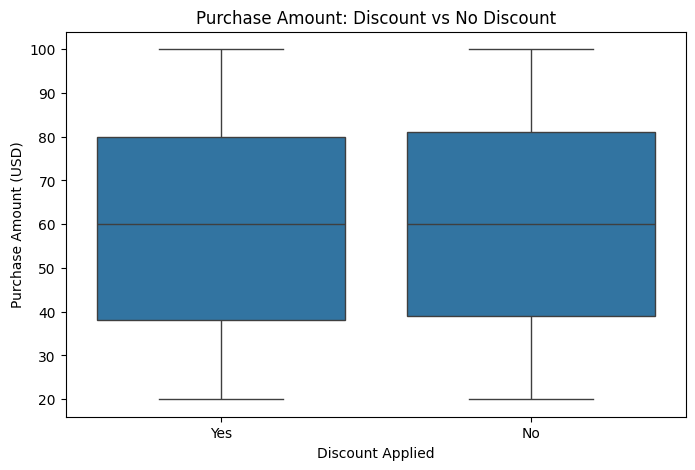

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x='Discount Applied',
    y='Purchase Amount (USD)'
)
plt.title('Purchase Amount: Discount vs No Discount')
plt.show()


Berdasarkan analisis distribusi nilai pembelian menggunakan boxplot, tidak ditemukan perbedaan yang signifikan antara transaksi dengan diskon dan tanpa diskon.


Median nilai pembelian pada kedua kelompok berada di kisaran yang sama, dengan sebaran (IQR) dan rentang nilai yang relatif identik.


Hal ini mengindikasikan bahwa penerapan diskon tidak berpengaruh besar terhadap peningkatan nilai belanja pelanggan, melainkan lebih berfungsi sebagai pemicu keputusan pembelian.

In [14]:
freq_discount = (
    df.groupby(['Frequency of Purchases', 'Discount Applied'])
    .size()
    .reset_index(name='Total Customers')
)

freq_discount


,Frequency of Purchases,Discount Applied,Total Customers
0,Annually,No,334
1,Annually,Yes,238
2,Bi-Weekly,No,321
3,Bi-Weekly,Yes,226
4,Every 3 Months,No,326
5,Every 3 Months,Yes,258
6,Fortnightly,No,299
7,Fortnightly,Yes,243
8,Monthly,No,316
9,Monthly,Yes,237


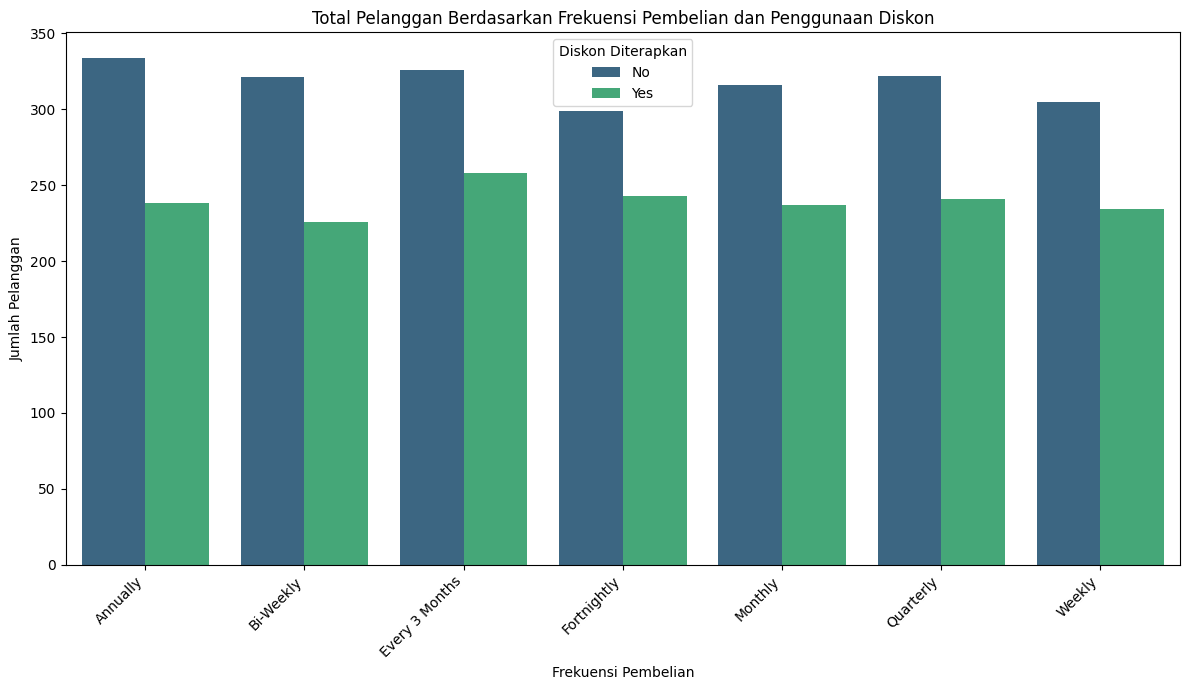

In [15]:
plt.figure(figsize=(12, 7))
sns.barplot(
    data=freq_discount,
    x='Frequency of Purchases',
    y='Total Customers',
    hue='Discount Applied',
    palette='viridis'
)
plt.title('Total Pelanggan Berdasarkan Frekuensi Pembelian dan Penggunaan Diskon')
plt.xlabel('Frekuensi Pembelian')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Diskon Diterapkan')
plt.tight_layout()
plt.show()

## Discount Usage Across Purchase Frequency

Analisis menunjukkan bahwa pada seluruh segmen frekuensi pembelian, jumlah pelanggan yang bertransaksi **tanpa diskon secara konsisten lebih tinggi**dibandingkan pelanggan yang menggunakan diskon.

Bahkan pada pelanggan dengan frekuensi pembelian tinggi (Weekly dan Bi-Weekly), diskon tidak menjadi faktor dominan dalam keputusan pembelian.

Temuan ini mengindikasikan bahwa loyalitas dan kebiasaan belanja pelanggan lebih dipengaruhi oleh kebutuhan dan preferensi produk, bukan oleh insentif harga.

# **Total penjualan per kategori & musim**

In [16]:
season_category_sales= (
df.groupby(['Season', 'Category'])['Purchase Amount (USD)']
.sum()
.reset_index()
)
season_category_sales

,Season,Category,Purchase Amount (USD)
0,Fall,Accessories,19874
1,Fall,Clothing,26220
2,Fall,Footwear,8665
3,Fall,Outerwear,5259
4,Spring,Accessories,17007
5,Spring,Clothing,27692
6,Spring,Footwear,9555
7,Spring,Outerwear,4425
8,Summer,Accessories,19028
9,Summer,Clothing,23078


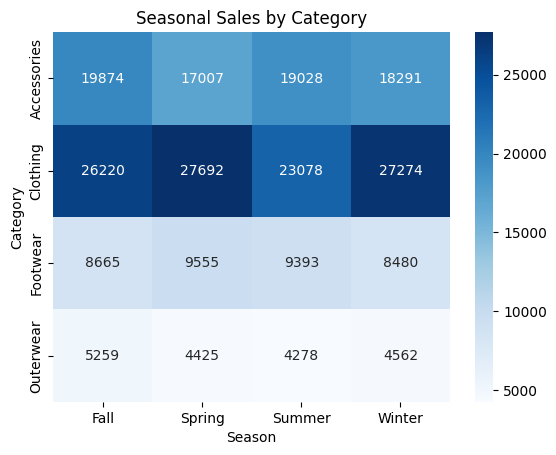

In [17]:
pivot=season_category_sales.pivot(
    index='Category',
    columns='Season',
    values='Purchase Amount (USD)'
)

sns.heatmap(pivot, annot=True, fmt='.0f', cmap='Blues')
plt.title('Seasonal Sales by Category')
plt.show()

**Sumbu:**

**X-axis :** Musim (Fall, Spring, Summer, Winter)

**Y-axis :** Kategori produk

**Angka & warna :** Total penjualan (semakin gelap = semakin tinggi)

**Artinya:** Kita melihat kategori mana yang kuat di musim tertentu dan mana yang stabil di semua musim.

Analisis musiman menunjukkan bahwa kategori **Clothing** secara konsisten menjadi kategori **dengan penjualan tertinggi di seluruh musim,** dengan performa puncak pada **Spring dan Winter**. Hal ini mengindikasikan bahwa **Clothing** merupakan produk inti (core product) yang memiliki permintaan stabil sepanjang tahun dan harus selalu diprioritaskan dalam perencanaan stok.

**Kategori Accessories juga menunjukkan performa yang relatif stabil di semua musim,** menjadikannya produk pendukung yang efektif untuk strategi cross-selling.

Sebaliknya,**Footwear dan Outerwear menunjukkan pola musiman yang lebih jelas.** Footwear cenderung meningkat pada Spring dan Summer, **sementara Outerwear memiliki performa terbaik pada Fall dan Winter. **Kedua kategori ini lebih cocok dikelola dengan strategi stok musiman dibandingkan stok sepanjang tahun

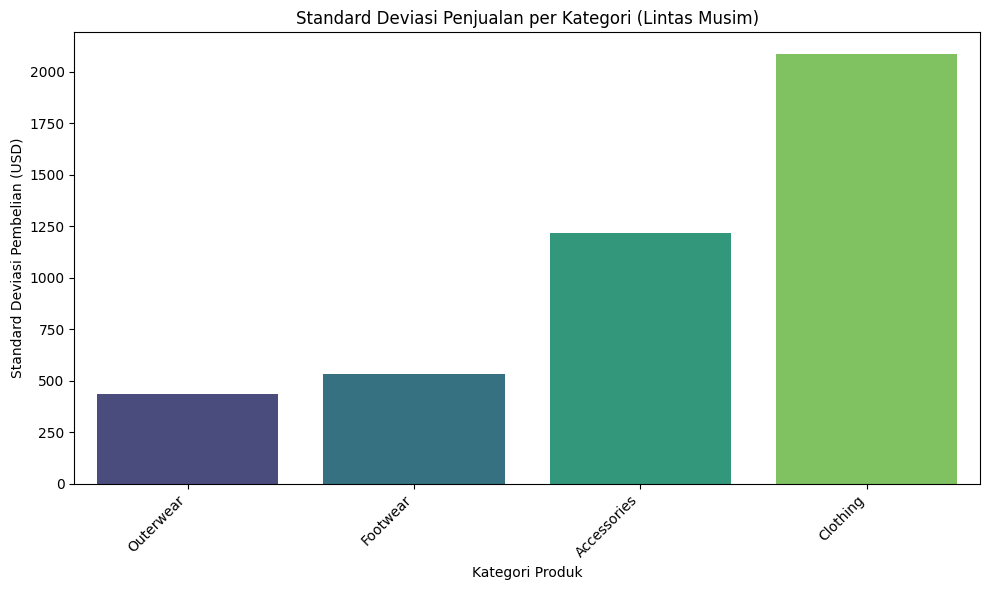

In [18]:
seasonal_std = (
    df.groupby(['Category', 'Season'])['Purchase Amount (USD)']
    .sum()
    .groupby('Category')
    .std()
    .sort_values()
)

plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_std.index, y=seasonal_std.values, hue=seasonal_std.index, palette='viridis', legend=False)
plt.title('Standard Deviasi Penjualan per Kategori (Lintas Musim)')
plt.xlabel('Kategori Produk')
plt.ylabel('Standard Deviasi Pembelian (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

rafik ini mengukur seberapa besar variasi penjualan suatu kategori di berbagai musim.

Standard Deviasi kecil → penjualan stabil

Standard Deviasi besar → penjualan naik-turun tajam (fluktuatif)

Kategori **Outerwear** dan **Footwear** memiliki standar deviasi paling rendah, yang mengindikasikan **pola penjualan yang relatif stabil dan mudah diprediksi sepanjang musim.**

Sebaliknya, **Clothing** menunjukkan standar deviasi tertinggi, menandakan **fluktuasi penjualan yang signifikan antar musim.** Hal ini mengindikasikan bahwa C**lothing sangat dipengaruhi oleh faktor musiman, tren, dan kampanye promosi.**

Kategori **Accessories** berada di tingkat fluktuasi menengah, menunjukkan adanya **lonjakan penjualan di periode tertentu** yang kemungkinan dipicu oleh momen khusus seperti event atau promo.

# **Final Conclusion**

### Berdasarkan seluruh tahapan analisis data perilaku belanja pelanggan, diperoleh beberapa kesimpulan utama:

-** Diskon bukan pendorong utama nilai belanja.**

Rata-rata nilai pembelian pelanggan dengan diskon dan tanpa diskon hampir sama, bahkan pelanggan tanpa diskon cenderung memiliki nilai belanja sedikit lebih tinggi. Ini menunjukkan bahwa diskon lebih berfungsi sebagai trigger pembelian, bukan untuk meningkatkan nilai transaksi.

- **Perilaku belanja relatif konsisten di semua frekuensi.**
Pada semua tingkat frekuensi pembelian (Weekly hingga Annually), jumlah pelanggan tanpa diskon selalu lebih tinggi dibandingkan yang menggunakan diskon. Hal ini mengindikasikan adanya **segmen pelanggan loyal yang membeli karena kebutuhan, bukan insentif harga.**

- **Clothing menjadi kategori utama namun paling fluktuatif.**
Clothing memiliki total penjualan tertinggi, tetapi juga variasi musiman paling besar. Kategori ini sangat dipengaruhi oleh musim, tren, dan momentum promosi.

- **Footwear dan Outerwear adalah kategori paling stabil.**
Kedua kategori ini menunjukkan variasi penjualan yang rendah antar musim, menjadikannya sebagai produk yang relatif aman dan konsisten untuk dijaga stoknya sepanjang tahun.

- **Musim memengaruhi performa kategori, bukan seluruh produk.**
Tidak semua kategori bersifat musiman. Sebagian produk laku stabil sepanjang tahun, sementara kategori lain sangat bergantung pada musim tertentu.

# **Business Recommendations**

- **Optimalkan strategi diskon, bukan memperluasnya.**
Gunakan diskon secara selektif (misalnya untuk customer baru atau seasonal campaign), bukan sebagai strategi utama peningkatan revenue.

- **Fokuskan campaign musiman pada Clothing.**
Karena paling responsif terhadap musim, Clothing ideal untuk promosi musiman, bundling, dan limited-time offers.

- **Jaga ketersediaan stok kategori stabil.**
Footwear dan Outerwear sebaiknya selalu tersedia karena memiliki permintaan yang konsisten sepanjang tahun.

- **Segmentasi strategi berdasarkan perilaku, bukan hanya harga.**
Banyak pelanggan membeli tanpa diskon, sehingga strategi berbasis loyalitas, kualitas produk, dan pengalaman belanja berpotensi lebih efektif daripada perang harga.